# HealthCare Quick EDA and Baseline Result

(working in progress...)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.rc('font', family='Malgun Gothic') # 한글 폰트 for Windows
plt.rc('font', family='AppleGothic') # 한글 폰트 for Mac

In [5]:
# value counts 기반 시각화

def value_counts_plot(df, col_name, sort_by_index=True):
    plt.figure(figsize=(12, 6))
    plt.title('Value Counts of ' + col_name)
    if sort_by_index:
        df[col_name].value_counts().sort_index().plot(kind='bar')
    else:
        df[col_name].value_counts().plot(kind='bar')

    plt.xticks(rotation=45)
    plt.show()

In [6]:
os.getcwd()

'/Users/ben/ML/Imbalanced'

In [7]:
data_dir = './data/'
TRAIN = 'train.csv'
TRAIN_DICT = 'train_data_dict.csv'

In [8]:
data_desc = pd.read_csv(os.path.join(data_dir, TRAIN_DICT))
display(data_desc)

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [9]:
df = pd.read_csv(os.path.join(data_dir, TRAIN))
display(df)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276848,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0


## NaN

In [12]:
print(df.isnull().sum())

print('---' * 30)

for idx, value in enumerate(df.isnull().sum()):
    if value != 0:
        print('"{}" column has {} null values'.format(df.columns[idx], value))

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64
------------------------------------------------------------------------------------------
"Bed Grade" column has 113 null values
"City_Code_Patient" column has 4532 null values


> Null 값은 침대 상태(`Bed Grade`)와 `City_Code_Patient` 변수에서 존재했음. 근데 City_Code_Patient는 어떤 정보를 담고 있는걸까?

In [13]:
df[['City_Code_Patient', 'City_Code_Hospital']]

,City_Code_Patient,City_Code_Hospital
0,7.0,3
1,7.0,5
2,7.0,1
3,7.0,2
4,7.0,2
...,...,...
318433,23.0,6
318434,8.0,1
318435,10.0,4
318436,8.0,2


City Code가 무엇인지 알아야할 필요가 있음. 병원가 환자별로 코드가 다름

In [14]:
df['City_Code_Patient'].value_counts().sort_index()

1.0      26377
2.0      38869
3.0       3772
4.0      15380
5.0      20079
6.0       6005
7.0      23807
8.0     124011
9.0      11795
10.0      8174
11.0       658
12.0      5647
13.0      1625
14.0      2927
15.0      8950
16.0      2254
18.0      1404
19.0      1028
20.0      1409
21.0      1602
22.0       405
23.0      3698
24.0       360
25.0       798
26.0      1023
27.0       771
28.0       521
29.0        98
30.0       133
31.0        59
32.0        52
33.0        78
34.0        46
35.0        16
36.0        12
37.0        57
38.0         6
Name: City_Code_Patient, dtype: int64

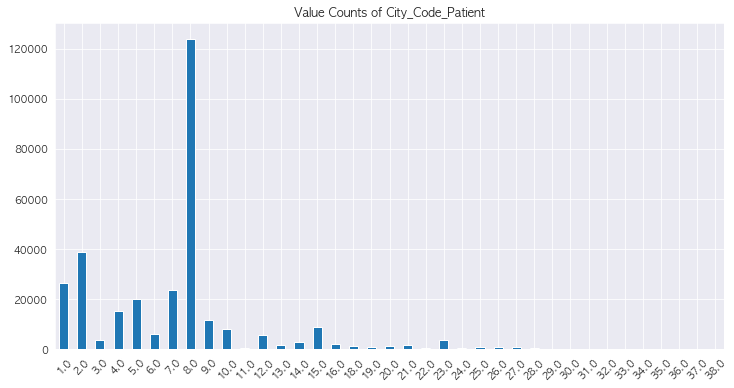

In [15]:
value_counts_plot(df, 'City_Code_Patient')

In [16]:
# plt.figure(figsize=(12, 6))
# df['City_Code_Patient'].value_counts().sort_index().plot(kind='bar')
# plt.xticks(rotation=45)

In [17]:
df['City_Code_Hospital'].value_counts().sort_index()

1     55351
2     51809
3     31569
4     13857
5     31105
6     46991
7     35463
9     26277
10     5249
11    17137
13     3630
Name: City_Code_Hospital, dtype: int64

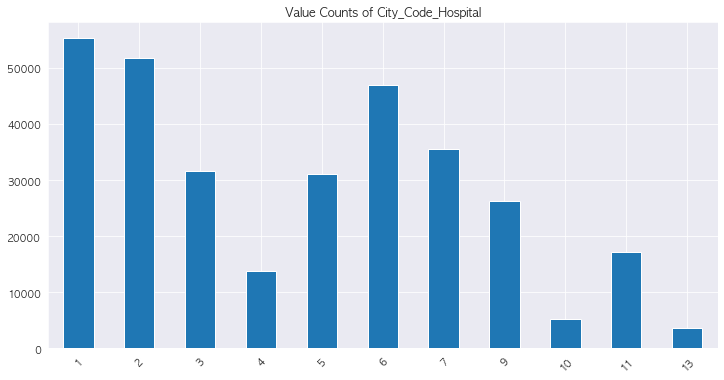

In [18]:
value_counts_plot(df, 'City_Code_Hospital')

In [19]:
df['patientid'].nunique()

92017

In [20]:
df[['City_Code_Hospital', 'patientid']].groupby('patientid').describe()

City_Code_Hospital                                                 
                       count      mean       std  min   25%  50%    75%   max
patientid                                                                    
1                        4.0  5.250000  3.304038  2.0  2.75  5.0   7.50   9.0
2                        2.0  2.500000  0.707107  2.0  2.25  2.5   2.75   3.0
4                        2.0  2.000000  1.414214  1.0  1.50  2.0   2.50   3.0
6                        1.0  3.000000       NaN  3.0  3.00  3.0   3.00   3.0
7                        4.0  1.250000  0.500000  1.0  1.00  1.0   1.25   2.0
...                      ...       ...       ...  ...   ...  ...    ...   ...
131620                   9.0  4.555556  1.878238  2.0  3.00  5.0   6.00   7.0
131621                   3.0  4.333333  2.309401  3.0  3.00  3.0   5.00   7.0
131622                   4.0  6.500000  6.403124  1.0  1.00  6.0  11.50  13.0
131623                   2.0  6.500000  0.707107  6.0  6.25  6.5   6.75   7.0
131624                   3.0  3.000000  2.645751  1.0  1.50  2.0   4.00   6.0

[92017 rows x 8 columns]

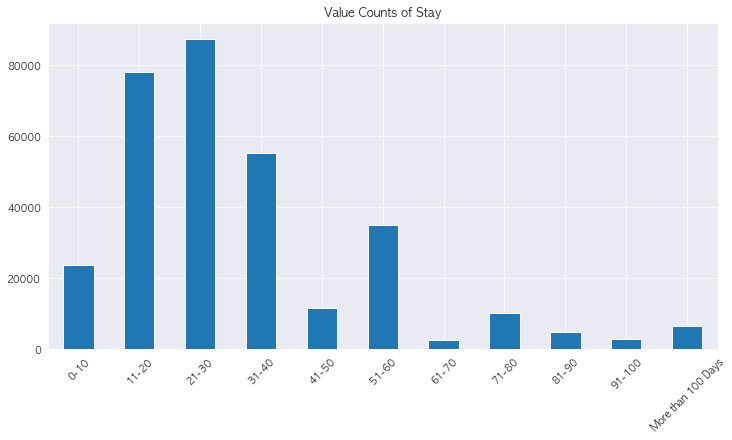

In [21]:
value_counts_plot(df, 'Stay')

0~60일까지 대부분의 데이터를 설명하는듯하다. 비율을 볼까?

In [22]:
print(df['Stay'].unique())
print(len(df['Stay'].unique()))

['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']
11


In [23]:
idx_list = list(df['Stay'].value_counts().sort_index().index)
print(idx_list)
print(idx_list.index('51-60'))

['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100 Days']
5


In [24]:
print(idx_list[:6])

['0-10', '11-20', '21-30', '31-40', '41-50', '51-60']


In [25]:
df['Stay'].isin(idx_list[:6])

0         True
1         True
2         True
3         True
4         True
          ... 
318433    True
318434    True
318435    True
318436    True
318437    True
Name: Stay, Length: 318438, dtype: bool

In [26]:
print("{} %".format(np.round(len(df.loc[ df['Stay'].isin(idx_list[:6]) ]) / len(df) * 100, 2)))

91.43 %


91.43%의 데이터가 60일까지의 `Stay`의 비율을 차지함. 그 이후 카테고리는 61일 이상으로 통합해주자

# Target 통합 1

In [27]:
stay_df = df.copy()

In [28]:
stay_df.loc[df['Stay'].isin(idx_list[6:]), 'Stay'] = '61+'
stay_df['Stay'].value_counts().sort_index() / len(stay_df) * 100

0-10      7.412432
11-20    24.538215
21-30    27.475050
31-40    17.321739
41-50     3.687688
51-60    10.996803
61+       8.568073
Name: Stay, dtype: float64

정상 변환한 것을 확인할 수 있음.

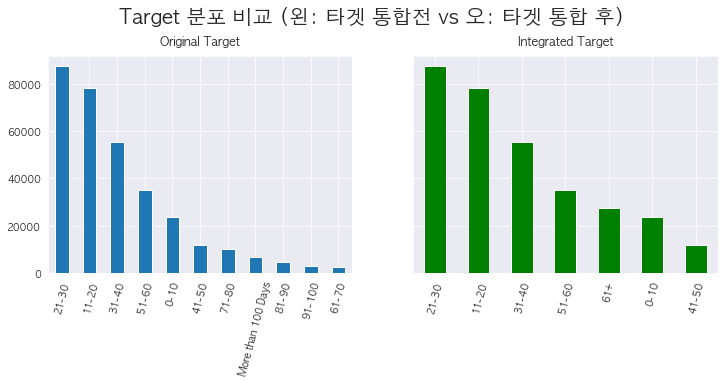

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharey=True)

fig.suptitle('Target 분포 비교 (왼: 타겟 통합전 vs 오: 타겟 통합 후)', fontsize=20, y=1.05)

# ax number 1 : Before
df['Stay'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].tick_params(axis='x', labelrotation=75)
ax[0].set_title('Original Target', y=1.02)

# ax number 2 : After
stay_df['Stay'].value_counts().plot(kind='bar', color='green', ax=ax[1])
ax[1].tick_params(axis='x', labelrotation=75)
ax[1].set_title('Integrated Target', y=1.02)

plt.show()

In [101]:
df[['Stay', 'Age']].groupby('Age').value_counts()

Age     Stay              
0-10    11-20                 1959
        21-30                 1489
        31-40                 1014
        0-10                   615
        51-60                  582
                              ... 
91-100  71-80                   63
        More than 100 Days      63
        61-70                   29
        81-90                   29
        91-100                  19
Length: 110, dtype: int64

# Performance of Baseline Model BEFORE and AFTER Redefining Target

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from lightgbm import LGBMClassifier

In [35]:
num_classes = stay_df['Stay'].nunique()
print(num_classes)

7


### baseline 태울 Encoding 먼저

In [31]:
le = LabelEncoder()
le.fit(stay_df['Stay'])

LabelEncoder()

In [103]:
# stay_label = le.classes_
stay_label

array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61+'],
      dtype=object)

In [33]:
stay_df['Stay'] = le.transform(stay_df['Stay'])
stay_df['Stay'].unique()

array([0, 4, 3, 1, 5, 2, 6])

In [34]:
stay_df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,1
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,3
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,1
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,1


In [60]:
stay_df.case_id.nunique() == len(stay_df)

True

In [56]:
decoding_dict = {}

for idx, dtype in enumerate(stay_df.dtypes):
    if dtype == 'object':
        col_name = list(stay_df.dtypes.index)[idx]
        # print(col_name)
        stay_df[col_name] = le.fit_transform(stay_df[col_name])
        decoding_dict[col_name] = list(le.classes_)

In [57]:
stay_df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                     int64
City_Code_Hospital                     int64
Hospital_region_code                   int64
Available Extra Rooms in Hospital      int64
Department                             int64
Ward_Type                              int64
Ward_Facility_Code                     int64
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                      int64
Severity of Illness                    int64
Visitors with Patient                  int64
Age                                    int64
Admission_Deposit                    float64
Stay                                   int64
dtype: object

In [61]:
X_train, X_test, y_train, y_test = train_test_split(stay_df.iloc[:, 1:-1],
                                                    stay_df.iloc[:, -1],
                                                    shuffle=True,
                                                    stratify=stay_df.iloc[:, -1],
                                                    random_state=42
                                                    )

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(238828, 16)
(238828,)
(79610, 16)
(79610,)


In [104]:
lgbm = LGBMClassifier(n_estimators=1000,
                      objective='multi_class',
                      num_class=num_classes,
                      # class_weight='balanced',
                      metric='multi_logloss',
                      n_jobs=-1,
                      random_state=42)

In [105]:
lgbm.fit(X_train, y_train)

LGBMClassifier(metric='multi_logloss', n_estimators=1000, num_class=7,
               objective='multi_class', random_state=42)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [106]:
y_pred = lgbm.predict(X_test)
y_pred[:10]

array([2, 1, 6, 1, 2, 1, 2, 3, 0, 3])

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.17      0.23      5901
           1       0.43      0.49      0.46     19535
           2       0.43      0.65      0.51     21873
           3       0.41      0.22      0.29     13790
           4       0.13      0.01      0.01      2936
           5       0.43      0.42      0.42      8754
           6       0.58      0.42      0.48      6821

    accuracy                           0.43     79610
   macro avg       0.39      0.34      0.34     79610
weighted avg       0.42      0.43      0.41     79610



In [108]:
accuracy_score(y_test, y_pred)

0.4320939580454717

In [109]:
y_pred_proba = lgbm.predict_proba(X_test)

In [116]:
# roc_auc_score(y_test, y_pred_proba, )
roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # one versus rest

0.7728171107074695

In [111]:
cm = confusion_matrix(y_test, y_pred)
cm / len(y_test) * 100

array([[1.28375832e+00, 3.47946238e+00, 2.51978395e+00, 7.53674162e-02,
        1.50734832e-02, 2.76347193e-02, 1.13051124e-02],
       [8.90591634e-01, 1.21379224e+01, 9.51262404e+00, 1.18578068e+00,
        2.38663484e-02, 6.39366914e-01, 1.48222585e-01],
       [6.19268936e-01, 7.85705313e+00, 1.77490265e+01, 6.14244442e-01,
        5.65255621e-02, 3.35385002e-01, 2.43687979e-01],
       [3.51714609e-01, 2.88782816e+00, 7.06067077e+00, 3.85629946e+00,
        3.76837081e-02, 2.56374827e+00, 5.63999498e-01],
       [1.29380731e-01, 6.68257757e-01, 2.27483984e+00, 2.49968597e-01,
        2.38663484e-02, 2.16053260e-01, 1.25612360e-01],
       [1.46966461e-01, 8.29041578e-01, 1.52242181e+00, 2.37156136e+00,
        1.38173596e-02, 4.59615626e+00, 1.51614119e+00],
       [1.26868484e-01, 4.24569778e-01, 1.02750911e+00, 9.76008039e-01,
        1.63296068e-02, 2.43436754e+00, 3.56236654e+00]])

<AxesSubplot: >

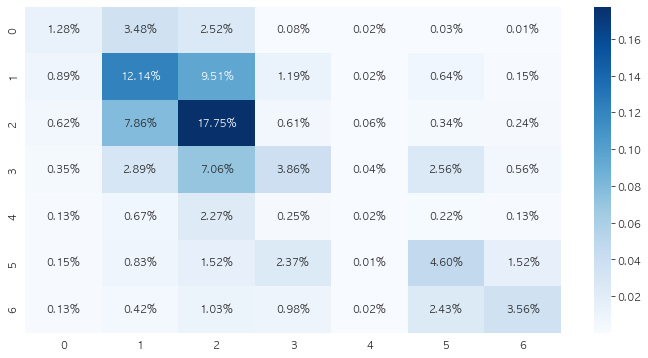

In [112]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(cm / len(y_test),
            cmap='Blues',
            fmt='.2%',
            annot=True,
            ax=ax)

In [113]:
# train 으로 예측해보자

In [114]:
y_pred_train = lgbm.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.5975178789756644

## XGBoost

In [117]:
from xgboost import XGBClassifier

In [118]:
xgb = XGBClassifier(n_estimators=1000,
                    objective='multi:softmax',
                    num_class=num_classes,
                    n_jobs=-1,
                    random_state=42)

In [119]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, num_class=7, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=42, ...)

In [121]:
y_pred_xgb = xgb.predict(X_test)
# y_pred_proba_xgb = xgb.predict_proba(X_test)

In [122]:
print(classification_report(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.35      0.19      0.24      5901
           1       0.43      0.49      0.45     19535
           2       0.43      0.63      0.51     21873
           3       0.39      0.24      0.29     13790
           4       0.15      0.01      0.03      2936
           5       0.43      0.40      0.41      8754
           6       0.55      0.43      0.48      6821

    accuracy                           0.43     79610
   macro avg       0.39      0.34      0.35     79610
weighted avg       0.42      0.43      0.41     79610

0.42788594397688734


In [ ]:
print(roc_auc_score(y_test, y_pred_xgb))

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(cm / len(y_test),
            cmap='Blues',
            fmt='.2%',
            annot=True,
            ax=ax)